### Title: 
# Support Vector Machine (SVM)

### Description:
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In this notebook, we will perform the Support Vector Machine algorithm from the scikit-learn package, plot the confussion matrix, the ROC-AUC curve, Precission-Recall curve, cumulative gains curve and lift curve.

### Authors:
#### Hugo Cesar Octavio del Sueldo
#### Jose Lopez Galdon

### Date:
11/12/2020

### Version:
2.0

***

### Libraries

In [1]:
    # Numpy & Pandas to work with the DF
import numpy as np
import pandas as pd

    # Seaborn / matplotlib for graphs
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

    # Import Sklearn
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import itertools
import scikitplot as skplt

    # Import pickle to save models
import pickle

### Functions

In [2]:
'''
This function prints and plots the confusion matrix:

cm = confussion_matrix using the prediction values
classes = name of the labels
cmap & tittle color map and tittle of the plot
'''
def plot_confusion_matrix(model_predictions, model_name, normalize=False): 
    cm = confusion_matrix(y_val, model_predictions, labels=[0, 1])
    classes=['Fully Pay', 'Non-payment']
    cmap = plt.cm.Reds
    title = f'{model_name} Confusion Matrix'
    fontsize = 12
    fontsize_lab = 15
    fontsize_tit = 20
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
        
        # Plot params
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=fontsize_tit)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=fontsize)
    plt.yticks(tick_marks, classes, fontsize=fontsize)
    
        # Itercool params
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label', fontsize=fontsize_lab)
    plt.xlabel('Predicted label', fontsize=fontsize_lab)

## Load data

In [3]:
    # To automate the work as much as possible, we will parameterize the codes, so in this case, we will create an objetct with
    # the path root
name = 'X_train'

X_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

name = 'Y_train'

y_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

name = 'X_val'

X_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

name = 'Y_val'

y_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory=False)                       # To avoid warnings we use set low_memory = False

In [4]:
    # Transform to 1d array
y_train = np.ravel(y_train)

## SVM prediction

In [5]:
    # Train
svmreg = SVC(random_state=1322, max_iter=2000, probability=True)
svmreg.fit(X_train, y_train)

C:\Users\jlope\anaconda3\envs\lending_club\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=2000, probability=True, random_state=1322)

In [6]:
    # Predict with the test and calculate tha accuracy
y_pred = svmreg.predict(X_val)
print('Accuracy of Support Vector Machine classifier on test set: {:.5f}'.format(svmreg.score(X_val, y_val)))

Accuracy of Support Vector Machine classifier on test set: 0.58585


### Confussion Matrix

It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.

#### Non normalized

Here we have the confussion matrix with the absolute values...

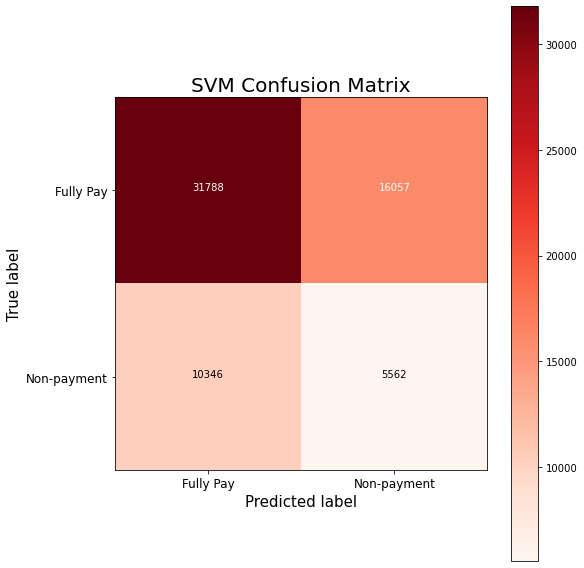

In [7]:
    # Set the size
plt.figure(figsize=(8, 8))

    # Use the function defined above
plot_confusion_matrix(y_pred, 'SVM', normalize=False)
plt.show()

#### Normalized

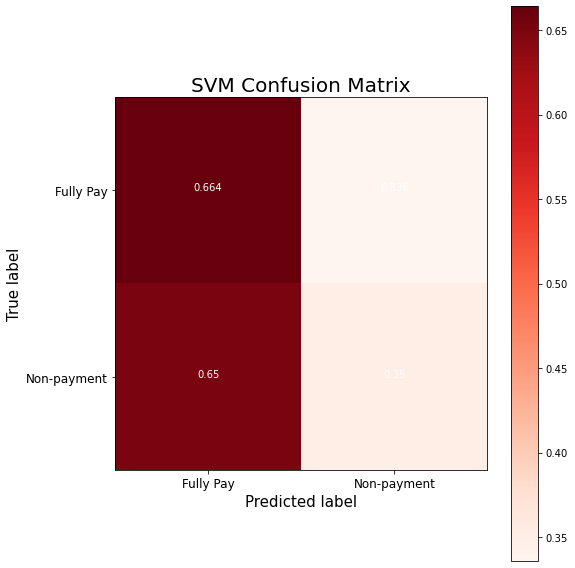

In [8]:
    # Set the size
plt.figure(figsize=(8, 8))

    # Use the function defined above
plot_confusion_matrix(y_pred, 'SVM', normalize=True)
plt.show()

Here we can see that our Support Vector Machine is worse than the logistic regression predicting Fully Pay members, because we have less than a 70% of *True Positives*, but is better predicting Non-paayment clients because we have a 35% of correct values.

### Classsification Report

In [9]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.71     47845
           1       0.26      0.35      0.30     15908

    accuracy                           0.59     63753
   macro avg       0.51      0.51      0.50     63753
weighted avg       0.63      0.59      0.60     63753



We can see at the `classification_report` that our model predict better the Non-payment customers than the logistic regression, because we have higher recall (*Recall = TP/(TP+FN)*), but our precision (remeber *Precision = TP/(TP + FP)*) is as worse as f1-score (*F1 Score = 2·(Recall · Precision) / (Recall + Precision)*) obtain bad results.

Predicting Fully Pay member is also worse than the logistic regression.

### ROC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

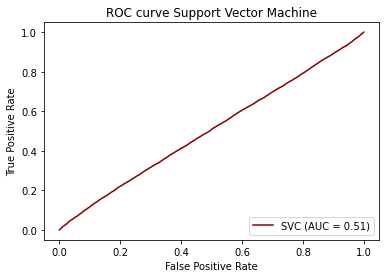

In [10]:
    # Parametrize
classifier = svmreg

disp = metrics.plot_roc_curve(classifier, X_val, y_val, color='#8B0000')

    # Set title
disp.ax_.set_title('ROC curve Support Vector Machine');

In this case we have an AUC = 0.51 this is a very low score, so we will not take this model in account for the final test.

### Precision-Recall curve

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

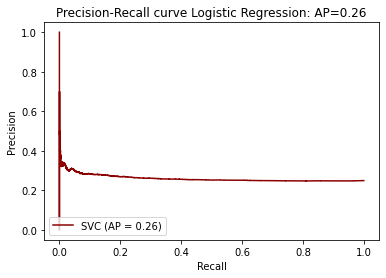

In [11]:
    # Parametrize
classifier = svmreg

    # Calculatr average precision
y_score = classifier.decision_function(X_val)
average_precision = average_precision_score(y_val, y_score)

    # Plot the recall curve
disp = plot_precision_recall_curve(classifier, X_val, y_val, color='#8B0000');

    # Set title
disp.ax_.set_title('Precision-Recall curve Logistic Regression: '
                   'AP={0:0.2f}'.format(average_precision));

Here we can see that does not matter the precission when the recall is hihger tan 0.1, always will be 0.3, this is a very poor rate.

### Cumulative gains curve

The cumulative gains curve is an evaluation curve that assesses the performance of the model and compares the results with the random pick. It shows the percentage of targets reached when considering a certain percentage of the population with the highest probability to be target according to the model.

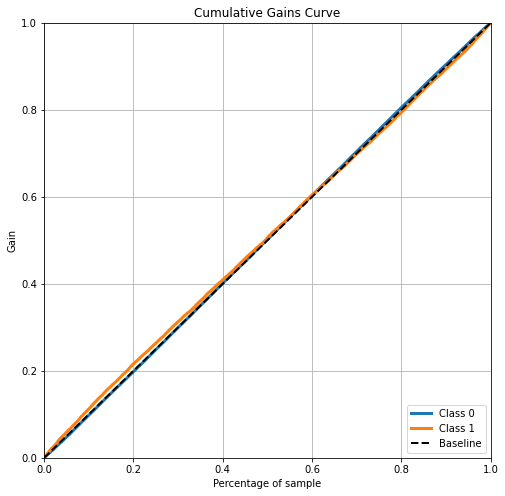

In [12]:
    # Deriving Class probabilities
predicted_probabilities = svmreg.predict_proba(X_val)

    # Creating the plot
skplt.metrics.plot_cumulative_gain(y_val, predicted_probabilities, figsize=(8,8));

In this plot we can see that our model is as poor as a random classification, so we will never use this algorithm to predict. The proportion is 1:1, if we analyze the 60% of our clients we will detect only the 60% of the non-payment.

### Lift curve

In addition to the cumulative gains curve, the lift curve is a widely used visualization of model performance. In definitive terms, the lift is a measure of the performance of a targeting model at predicting or classifying cases as having an enhanced response (for the population as a whole), measured against a random choice targeting model. Constructing a lift curve follows a similar process as forming the cumulative gain curve. Indeed, it is derived from the gain chart. First, we order observations on the horizontal axis with the highest probability of being a target on the left and vice versa for the right-hand side. On the vertical axis, the lift curve indicates how many times more than average targets are included in this group. Lift is calculated as the ratio of Cumulative Gains from classification and random models.

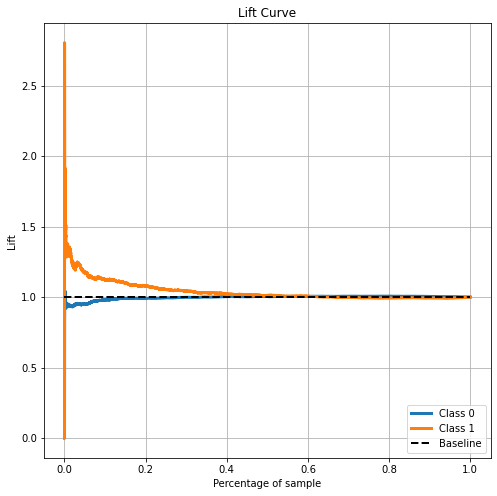

In [13]:
    # Plot the lift curve
skplt.metrics.plot_lift_curve(y_val, predicted_probabilities, figsize=(8,8));

As we said before, we can see that there is no difference between the targets at 60% so this model is classifing very bad. This is due to a bad recall and a poor precission.

### Save model

In [14]:
    # Parametrize
model = svmreg
filename = "svm.sav"

    # Save the model
pickle.dump(model, open(filename, 'wb'))